<a href="https://colab.research.google.com/github/adervish/tesla/blob/main/Tesla%20data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json
import numpy as np
import matplotlib

#Read current raw data from Google Sheets
url = 'https://docs.google.com/spreadsheets/d/1GpcZQ2WNRPQ9sYN_VJfMglHW-4MEOsjyuqGYh-cg1Cg/gviz/tq?tqx=out:csv&sheet=data'
df = pd.read_csv(url)

df['Matches'].astype(int)
df_matches = df[ df['Matches'] > 0]

frames = []

# Explode the JSON arrays that are returned in each row of the google sheet
for index, row in df_matches.iterrows():    
    f = pd.json_normalize(json.loads(row['RAW'])['results'])
    f = f.assign(date=row['Date'],raw=row['RAW'],matches=row['Matches'],search_url=row['URL'],search_zip=row['Zipcode'],search_model=row['Model'])
    frames.append(f)
    
tesla_data = pd.concat(frames)
tesla_data['date']= pd.to_datetime(tesla_data['date'])

#list(tesla_data.columns)




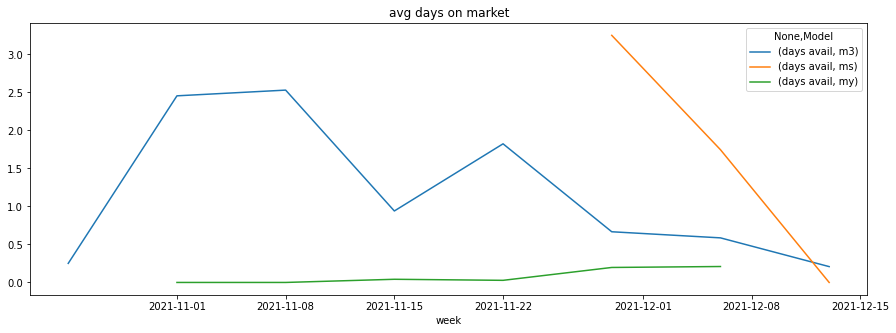

In [2]:
agg_by_vin = tesla_data.groupby(['VIN', 'Model', 'Price','SalesMetro']).date.agg(['min', 'max'])
agg_by_vin['days avail'] = agg_by_vin['max'] - agg_by_vin['min']
agg_by_vin['week'] = (agg_by_vin['min'] - pd.to_timedelta(agg_by_vin['min'].dt.dayofweek, unit='d')).dt.date

def to_days(x):
  return x.total_seconds() / 60 / 60 / 24

agg_by_vin['days avail'] = agg_by_vin['days avail'].apply(to_days)

avg_days = pd.pivot_table(data=agg_by_vin,index=['week'], columns=['Model'],aggfunc={'days avail': np.mean})
avg_days.plot(title='avg days on market',figsize=(15, 5))


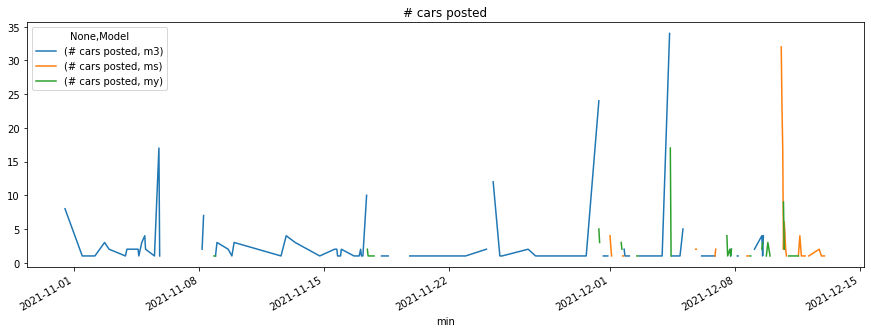

In [3]:
agg_by_vin = tesla_data.groupby(['VIN', 'Model', 'Price','SalesMetro']).date.agg(['min', 'max'])
agg_by_vin['days avail'] = agg_by_vin['max'] - agg_by_vin['min']
#agg_by_vin['week'] = (agg_by_vin['min'] - pd.to_timedelta(agg_by_vin['min'].dt.dayofweek, unit='d')).dt.date

def to_days(x):
  return x.total_seconds() / 60 / 60 / 24

agg_by_vin['# cars posted'] = agg_by_vin['days avail'].apply(to_days)

avg_days = pd.pivot_table(data=agg_by_vin,index=['min'], columns=['Model'],aggfunc={'# cars posted': 'count'})
avg_days.plot(title='# cars posted',figsize=(15, 5))

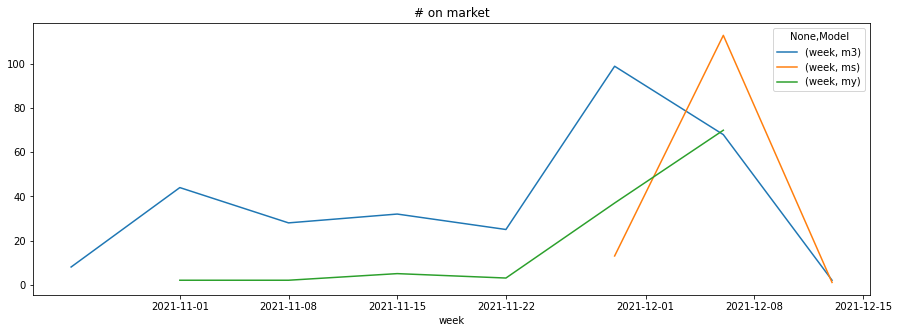

In [4]:
agg_by_vin = tesla_data.groupby(['VIN', 'Model', 'Price','SalesMetro']).date.agg(['min', 'max'])
agg_by_vin['days avail'] = agg_by_vin['max'] - agg_by_vin['min']
agg_by_vin['week'] = (agg_by_vin['min'] - pd.to_timedelta(agg_by_vin['min'].dt.dayofweek, unit='d')).dt.date
num_avail = pd.pivot_table(data=agg_by_vin,index=['week'], columns=['Model'],aggfunc={'week':'count'})
num_avail.plot(title='# on market',figsize=(15, 5))

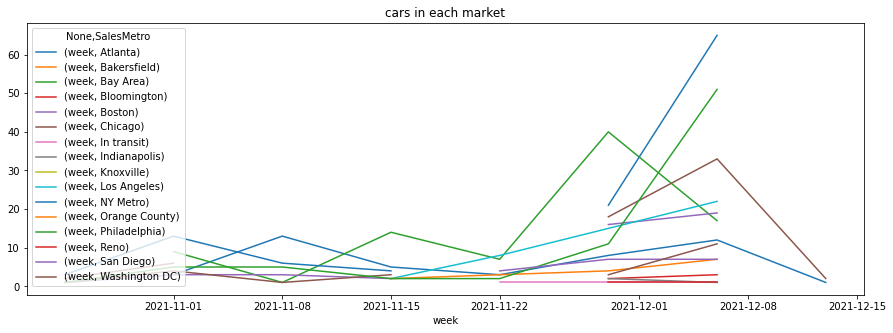

In [5]:
agg_by_vin = tesla_data.groupby(['VIN', 'Model', 'Price','SalesMetro']).date.agg(['min', 'max'])
agg_by_vin['days avail'] = agg_by_vin['max'] - agg_by_vin['min']
agg_by_vin['week'] = (agg_by_vin['min'] - pd.to_timedelta(agg_by_vin['min'].dt.dayofweek, unit='d')).dt.date
num_avail = pd.pivot_table(data=agg_by_vin,index=['week'], columns=['SalesMetro'],aggfunc={'week':'count'})
num_avail.plot(title='cars in each market',figsize=(15, 5))
